<h1>logistic-regression_lesson</h1>
<h2>Machine data-set</h2>

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('data/logreg.csv')

In [3]:
data.head()

,MC Age(months),Avg number of shift/week,MC meets spec
0,78,8,0
1,73,5,0
2,73,8,0
3,71,7,0
4,68,5,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
MC Age(months)              20 non-null int64
Avg number of shift/week    20 non-null int64
MC meets spec               20 non-null int64
dtypes: int64(3)
memory usage: 560.0 bytes


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


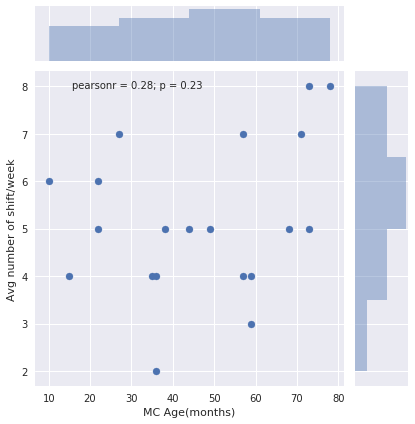

In [5]:
sns.jointplot('MC Age(months)', 'Avg number of shift/week', data=data)

/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


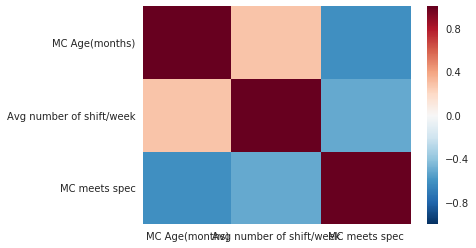

In [6]:
sns.heatmap(data.corr())

In [8]:
X = data[['MC Age(months)', 'Avg number of shift/week']]
Y = data['MC meets spec']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logModel = LogisticRegression()

In [13]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print(X_test)
print(y_test)

    MC Age(months)  Avg number of shift/week
18              15                         4
1               73                         5
19              10                         6
8               35                         4
10              59                         3
17              22                         6
18    1
1     0
19    1
8     0
10    1
17    1
Name: MC meets spec, dtype: int64


In [15]:
predictions = logModel.predict(X_test)
print(predictions)

[1 0 1 0 0 0]


In [16]:
logModel.score(X, Y)

0.65000000000000002

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         2
          1       1.00      0.50      0.67         4

avg / total       0.83      0.67      0.67         6



In [19]:
from sklearn.metrics import log_loss
log_loss(y_test,predictions)

11.512925464970229

In [20]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.643696
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          MC meets spec   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:                 0.07134
Time:                        07:18:42   Log-Likelihood:                -12.874
converged:                       True   LL-Null:                       -13.863
                                        LLR p-value:                    0.1596
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
MC Age(months)              -0.0274      0.023     -1.197      0.231      -0.072

/srv/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
